In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif


In [2]:
dataset = pd.read_csv("selectedFeatures.csv")
df=dataset

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
#y[y != "Control"] = "Disease"

In [5]:
y

array(['BMD', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS',
       'ALS', 'LGMD', 'LGMD', 'LGMD', 'LGMD', 'LGMD', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'BMD', 'BMD', 'BMD', 'BMD', 'LGMD', 'LGMD', 'LGMD',
       'LGMD', 'LGMD', 'LGMD', 'LGMD', 'LGMD', 'LGMD', 'DMD', 'DMD',
       'DMD', 'DMD', 'DMD', 'Control', 'Control', 'Control', 'Control',
       'Control', 'EDMD', 'EDMD', 'EDMD', 'EDMD', 'EDMD', 'EDMD', 'EDMD',
       'EDMD', 'LGMD', 'LGMD', 'LGMD', 'LGMD', 'LGMD', 'LGMD', 'LGMD',
       'Control', 'Control', 'Control', 'LGMD', 'Control', 'Control',
       'Control', 'Control', 'Control', 'AQM', 'AQM', 'AQM', 'AQM', 'AQM',
       'HSP', 'HSP', 'HSP', 'HSP', 'NHM', 'NHM', 'DMD', 'FSHD', 'FSHD',
       'FSHD', 'DMD', 'FSHD', 'DMD', 'FSHD', 'FSHD', 'FSHD', 'FSHD',
       'DMD', 'DMD', 'FSHD', 'FSHD', 'FSHD', 'FSHD', 'FSHD', 'JDM', 'JDM',
       'JDM', 'JDM', 'JDM', 'JDM', 'JDM', 'JDM', 'JDM', 'JDM', 'JDM',
     

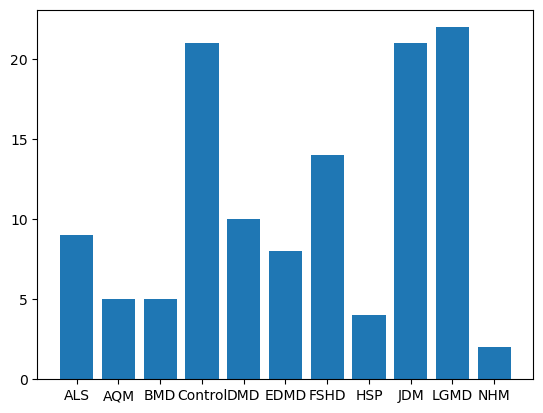

In [6]:
import numpy as np
import matplotlib.pyplot as plt
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.show()

In [7]:
#values_to_remove = ['NHM', 'AQM' , 'BMD','HSP']
#mask = ~df.iloc[:, -1].isin(values_to_remove)

In [8]:
#df = df[mask]

In [9]:
#X = df.iloc[:, :-1].values
#y = df.iloc[:, -1].values

In [10]:
#''''''import numpy as np
#import matplotlib.pyplot as plt
#unique, counts = np.unique(y, return_counts=True)
#plt.bar(unique, counts)
#plt.show()

**Ensample method**

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [8]:
# Perform feature selection using RFE with Logistic Regression
estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=88, step=10)
selector = selector.fit(X, y)
X = selector.transform(X)


In [9]:
np.savetxt("Features.txt", X)
X = np.loadtxt("Features.txt")

In [10]:
# Create a StratifiedKFold object with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
accuracy_list_of_lr=[]
accuracy_list_of_rf=[]
accuracy_list_of_svm=[]
accuracy_list_of_mlp=[]
lr_train_accuracy_list = []
rf_train_accuracy_list = []
svm_train_accuracy_list = []
mlp_train_accuracy_list = []

In [12]:
# Train and evaluate several machine learning models on each fold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train and evaluate Logistic Regression
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    lr_accuracy = lr_model.score(X_test, y_test)
    accuracy_list_of_lr.append(lr_accuracy)
    lr_train_accuracy = lr_model.score(X_train, y_train)
    lr_train_accuracy_list.append(lr_train_accuracy)
    #print("Logistic Regression Accuracy:", lr_accuracy)
    
    # Train and evaluate Random Forest
    rf_model = RandomForestClassifier(n_estimators=100)
    rf_model.fit(X_train, y_train)
    rf_accuracy = rf_model.score(X_test, y_test)
    accuracy_list_of_rf.append(rf_accuracy)
    rf_train_accuracy = rf_model.score(X_train, y_train)
    rf_train_accuracy_list.append(rf_train_accuracy)
    
    #print("Random Forest Accuracy:", rf_accuracy)
    
    # Train and evaluate Support Vector Machine
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    svm_accuracy = svm_model.score(X_test, y_test)
    accuracy_list_of_svm.append(svm_accuracy)
    svm_train_accuracy = svm_model.score(X_train, y_train)
    svm_train_accuracy_list.append(svm_train_accuracy)
    #print("Support Vector Machine Accuracy:", svm_accuracy)
    
    # Train and evaluate Multi-Layer Perceptron
    mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50))
    mlp_model.fit(X_train, y_train)
    mlp_accuracy = mlp_model.score(X_test, y_test)
    accuracy_list_of_mlp.append(mlp_accuracy)
    mlp_train_accuracy = mlp_model.score(X_train, y_train)
    mlp_train_accuracy_list.append(mlp_train_accuracy)
    #print("Multi-Layer Perceptron Accuracy:", mlp_accuracy)
    

C:\Users\marye\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [13]:

# Calculate the average accuracy
average_accuracy_of_lr = sum(accuracy_list_of_lr) / len(accuracy_list_of_lr)
print("Average Logistic Regression Accuracy:", average_accuracy_of_lr)

# Calculate the average accuracy
average_accuracy_of_rf = sum(accuracy_list_of_rf) / len(accuracy_list_of_rf)
print("Average Ramdom Forest:", average_accuracy_of_rf)

# Calculate the average accuracy
average_accuracy_of_svm = sum(accuracy_list_of_svm) / len(accuracy_list_of_svm)
print("Average Support Vector Machine:", average_accuracy_of_svm)

# Calculate the average accuracy
average_accuracy_of_mlp = sum(accuracy_list_of_mlp) / len(accuracy_list_of_mlp)
print("Average Multilayer Preception:", average_accuracy_of_mlp)

Average Logistic Regression Accuracy: 0.8676666666666666
Average Ramdom Forest: 0.752
Average Support Vector Machine: 0.826
Average Multilayer Preception: 0.5636666666666666


In [14]:
# Calculate the average training accuracy for each model
lr_average_train_accuracy = sum(lr_train_accuracy_list) / len(lr_train_accuracy_list)
rf_average_train_accuracy = sum(rf_train_accuracy_list) / len(rf_train_accuracy_list)
svm_average_train_accuracy = sum(svm_train_accuracy_list) / len(svm_train_accuracy_list)
mlp_average_train_accuracy = sum(mlp_train_accuracy_list) / len(mlp_train_accuracy_list)

# Print the average training accuracy for each model
print("Logistic Regression Average Train Accuracy:", lr_average_train_accuracy)
print("Random Forest Average Train Accuracy:", rf_average_train_accuracy)
print("Support Vector Machine Average Train Accuracy:", svm_average_train_accuracy)
print("Multi-Layer Perceptron Average Train Accuracy:", mlp_average_train_accuracy)

Logistic Regression Average Train Accuracy: 1.0
Random Forest Average Train Accuracy: 1.0
Support Vector Machine Average Train Accuracy: 1.0
Multi-Layer Perceptron Average Train Accuracy: 0.9958762886597938
